# Question 4

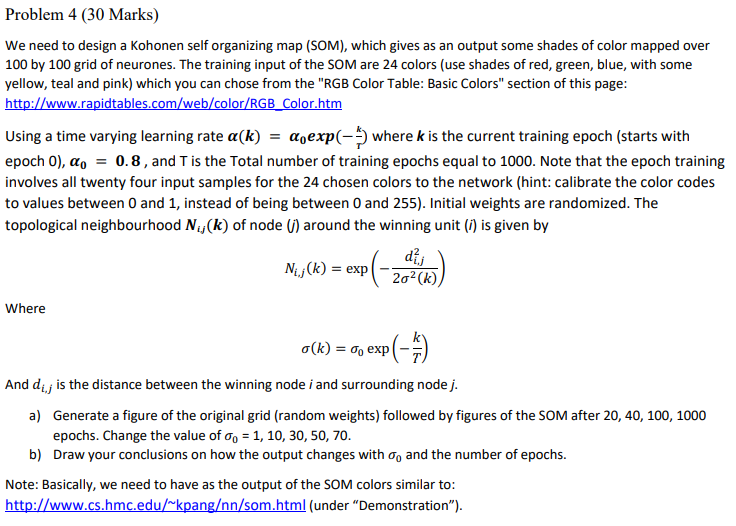

## Reference 

For understanding how to implement Self-Organizing Maps, we have referred the following blog:

*   [Self-Organizing Maps: Theory and Implementation in Python with NumPy by David Landup](https://stackabuse.com/self-organizing-maps-theory-and-implementation-in-python-with-numpy/)

## Acronyms:

*   SOM - Self-Organizing Map

## Note:

*   **All the results in the code are replicable because the random state is seed to 0 for all the random generation.**




## Import required libraries

1.   **numpy** is used for storing and updating weights as it is faster compared to traditional list and arrays.
2.   **matplotlib.pyplot** is used for visualization of results as graphs and plots.
3.   **MinMaxScaler** module from **sklearn.preprocessing** is used for scaling the selected 24 training color shades to 



    
   

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## Seeding the random state to 0 to replicate the results again.

In [2]:
# Initializing np.random state to a value of 81 to recreate the exact results when needed
rand = np.random.RandomState(0)

## Function for selecting the winner node that best represents the training instance.


*   **How to select one winner node when there are multiple best matches (exactly same distance to the training shade/color)?**


> The node with the smallest index is then chosen as the winning node. There are other way to resolve the conflict such as choosing the best winning node randomly but it is not recommended as it gets difficult to predict the results of such approach. Other way to select the winning node is through selecting the node with largest index in the lot.





In [3]:
# Function for selecting the winner node
def select_winning_node(SOM, training_instance_x):
  """
  Inputs:
    SOM - map of node from which the winner node is to be selected.
    training_instance_x - the instance to be mapped in the SOM grid.
  
  Output:
    (x,y) - winning unit index in the SOM grid.
  
  """
  # Calculate the distance of each node in SOM from the training instance x 
  distSq = (np.square(SOM - training_instance_x)).sum(axis=2)
  
  #return the winner node with smallest index value
  return np.unravel_index(np.argmin(distSq, axis=None), distSq.shape)

## Function for updating weights of the Self-Organizing Map

*   The function takes SOM grid, training instance shade, learning rate (α) of the kth epoch, spread radius of the neighborhood of the winning node (σ) of the kth epoch, coordinates of the winning unit (x,y) in the SOM grid.
*   Neighbor units are selected using the neighborhood radius (σ) and only these units' weights are updated.
*   The weights of neighbor units of winning unit are influenced inversely proportional to their distance from the winning node. This neighbor units weight updation is carried using the **gaussian rule**. Closer the neighbor unit to the winning node more the change in its weight.







In [4]:
def update_weights(SOM, training_instance_x, alpha_k, sigma_k, winner_coord):
  """
  Inputs:
    SOM - map of nodes with winning node and neighbor units.
    training_instance_x - training example color/shade given.
    alpha_k - learning rate at kth iteration.
    sigma_k - neighborhood radius at kth iteration.
    winner_coord - (x,y) coordinates of the winner unit in the SOM grid.
  Output:
    SOM - updated SOM grid
  """
  
  # The number of rows and columns in the SOM grid is fetched
  rows, cols = SOM.shape[0], SOM.shape[1]

  # X and Y coordinates of the winner unit is fetched
  win_x, win_y  = winner_coord
  
  # when the neighborhood radius is very 
  if sigma_k < 1e-3:
        SOM[win_x,win_y,:] += alpha_k * (training_instance_x - SOM[win_x,win_y,:])
        return SOM

  # The x-axis boundaries of neighborhood of winning unit
  low_x = max(0, int(win_x - sigma_k))
  high_x = min(rows, int(win_x + sigma_k))

  # The y-axis boundaries of neighborhood of winning unit
  low_y = max(0, int(win_y - sigma_k))
  high_y =  min(cols, int(win_y + sigma_k))
  
  for i in range(low_x, high_x):
    for j in range(low_y,high_y):
      # Calculate distance between winning unit and the neighbor unit 
      distance_ij = np.square(i - win_x) + np.square(j - win_y)

      # Squaring and doubling the sigma_k parameter
      sigma_k_sq = 2*(sigma_k**2)

      # Adjustment factor in updating weight is exponent of distance divided by factor of sigma
      N_k_ij = np.exp(-distance_ij / sigma_k_sq)
      
      # Final weight updation step
      SOM[i,j,:] += alpha_k * N_k_ij * (training_instance_x - SOM[i,j,:])   
  return SOM 

## Training function for the Self-Organizing Map (SOM)


*   Every epoch, the SOM is trained for all 24 shades.
*   Every epoch, the decay rate of the adaptive learning rate and the adaptive neighborhood radius is proportional to current number of iteration. Thus, the learning rate and the radius decreases as the epochs increase. 
*   Every epoch, the training data of 24 colors are shuffled just to introduce some randomness in which shade is mapped first. This just done for the sake of fairness. 
*   Every epoch, for each training example (from the 24 shades) the best/winner node is selected via the function "select_winning_node" and then after finding the winner unit, the weights of the map are updated using the function "update_weights" 



In [5]:
def train_SOM(SOM, train_data, alpha_0 = .8, sigma_0 = 10,  T = 1000):    
  """
  Inputs:
    SOM - the self-organizing map to be trained for the 24 color shades.
    train_data - 24 color shades of red, blue green with yellow, teal and pink for training.
    alpha_0 - initial learning rate.
    sigma_0 - initial neighborhood radius.
    T = total epoches to train the model for.
  Output:
    SOM - trained Map for T epochs using train_data.
  """
  for k in range(0, T):
    # if not k%100:
    #   print("Epoch {}".format(k))
    
    # randomly shuffling the 24 shades before starting the training of SOM and seeding the Random state with replicate the results
    rand.shuffle(train_data)

    # Update learning rate and radius
    alpha_k = alpha_0 * np.exp(-k/T)
    sigma_k = sigma_0 * np.exp(-k/T)    
 
    #train for all the 24 shades one by one    
    for train_ex in train_data:

      #find the best match for the given shade in the SOM grid
      win_x, win_y = select_winning_node(SOM, train_ex) 
      
      #update the weights of winner node and its neighbors using gaussian updation rule
      SOM = update_weights(SOM, train_ex, alpha_k, sigma_k, (win_x, win_y))
     
  return SOM

## Initializing the dimesions of the SOM grid:


1.   Number of rows = 100
2.   Number of columns = 100

Therefore, the total number of units/nodes in the SOM is 100x100 = 10,000.




In [6]:
# Dimensions of the SOM grid
rows = 100
cols = 100

## Selecting 24 shades of Red, Blue, Green with shades of Yellow, Teal and Pink.

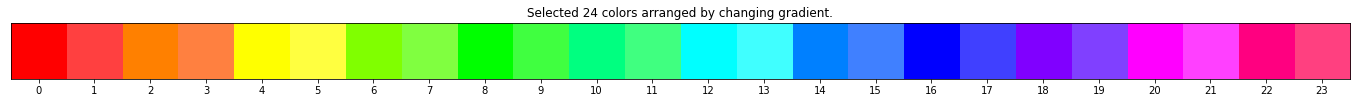

In [7]:
# Initialize the training data
train_data = [
      [255,0,0],      #1 - Red
      [255, 64, 64],  #2
      [255, 128, 0],  #3    
      [255, 128, 64], #4    
      [255, 255, 0],  #5 - Yellow   
      [255, 255, 64], #6    
      [128, 255, 0],  #7    
      [128, 255, 64], #8    
      [0, 255, 0],    #9 - Green   
      [64, 255, 64],  #10    
      [0, 255, 128],  #11    
      [64, 255, 128], #12   
      [0, 255, 255],  #13 - Teal/Cyan   
      [64, 255, 255], #14    
      [0, 128, 255],  #15    
      [64, 128, 255], #16    
      [0, 0, 255],    #17 - Blue  
      [64, 64, 255],  #18    
      [128, 0, 255],  #19    
      [128, 64, 255], #20    
      [255, 0, 255],  #21 - Pink/Magneta 
      [255, 64, 255], #22    
      [255, 0, 128],  #23    
      [255, 64, 128], #24    
]

# Converting the train_data list to numpy array for ease of calculation.
train_data = np.array(train_data)

# Creating the copy of the train data to visualize it.
copy = np.copy(train_data).reshape(1,24,3)

# Plotting the train data
fig, ax = plt.subplots(figsize=(24, 5),subplot_kw=dict(xticks=np.arange(0,24,1), yticks=[]))
ax.imshow(copy)
ax.title.set_text("Selected 24 colors arranged by changing gradient.")


## Scaling the train data from the range of [0,255] to [0,1].

*   The scaling is done using **MinMaxScaler** from sklearn.preprocessing library.



In [8]:
# Scaling the train data to [0,1] range from [0,255].
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(train_data)
train_data = minmax_scaler.transform(train_data)

## Randomly initilizing the SOM grid and visualizing it.


*   The value of the units in the SOM grid is in the range [0,1].
*   The shape of the SOM grid is 100x100x3 where 3 is the number of color channels = Red, Green and Blue.



In [9]:
# Initialize the SOM randomly in the range [0,1] using the pre-seed np.random with Random State of 0. 
SOM = rand.uniform(low= 0, high=1, size= (rows, cols, 3)).astype(float)

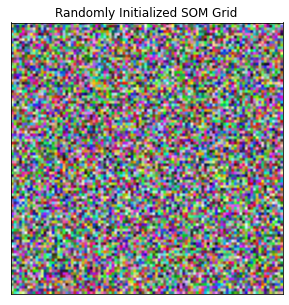

In [10]:
# Visualizing the randomly generated SOM grid.
fig, ax = plt.subplots(figsize=(5, 5),subplot_kw=dict(xticks=[], yticks=[]))
ax.imshow(SOM)
ax.title.set_text('Randomly Initialized SOM Grid')

## Testing the output with changing the initial sigma (neighborhood radius) parameter.



*   List of epochs = [20, 40, 100, 1000]
*   List of sigma values = [1, 10, 30, 50, 70]



In [11]:
# Initialize the list of epochs and sigma values
epochs = [20, 40, 100, 1000]
sigma_values = [1, 10, 30, 50, 70]

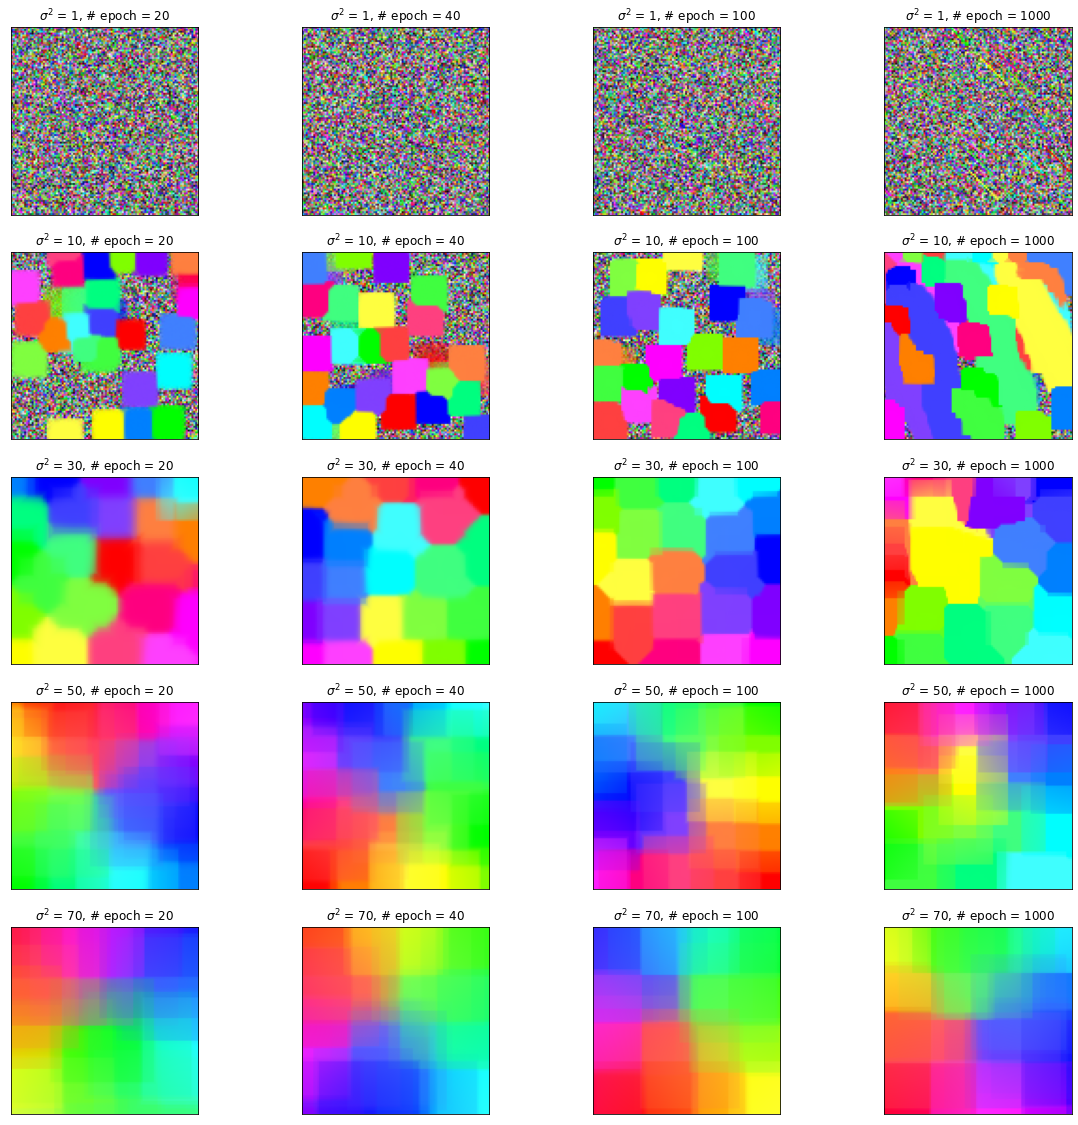

In [12]:
# Plotting the output using subplots
fig, ax = plt.subplots(
    nrows=len(sigma_values), ncols=len(epochs), figsize=(20, 20), 
    subplot_kw=dict(xticks=[], yticks=[]))

# For each value
for sigma, i in zip(sigma_values, range(len(sigma_values))):
    for epoch, j in zip(epochs, range(len(epochs))):
        SOM = rand.uniform(low= 0, high=1, size= (rows, cols, 3)).astype(float)
        resultant_SOM = train_SOM(SOM, train_data, T = epoch ,alpha_0 = 0.8, sigma_0 = sigma)
        ax[i][j].imshow(resultant_SOM)
        ax[i][j].title.set_text('$\sigma^2$ = ' + str(sigma) + 
                                ', # epoch = ' + str(epoch))

## Conclusion 

*   As the SOM is trained with increasing number of epochs, the center for each color are intensified.
*   Increasing the sigma value (neighborhood radius), the resultant SOM grid wil have clear different colors with smooth transitions.
*   As the numner of epoch increases the output is sharper. The boundary of each color is more visible. 
*   As we can see in the output of the sigma value = 10 as the number of epoch increases the colors are spread out widely. 
*   With the increase in the sigma value the region affected by the training example increases as we can see in the first row with sigma value = 1 there are no regions created regardless of the increase in the number of training epochs.
*   Sigma value increase the transition of colors is smoother compared to the output of the lower sigma value.

